<a href="https://colab.research.google.com/github/cgangwar11/Coding-Practice/blob/master/demo_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [160]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai import *
from fastai.text import *
import spacy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
nlp = spacy.load('en')

In [162]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
data_clas = load_data('/gdrive/My Drive/imdb', 'data_clas.pkl', bs=48)

In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)

In [0]:
learn = learn.load('third_v1')

In [0]:
pred,senti = pred.numpy(),senti.numpy()

In [0]:
doc = nlp(str(data_clas.x[10]))

In [0]:
data.loc[3] = ["This movie is c really good",senti[1],senti[0],pred*-1]

In [0]:
corpus = """
 Europe’s main stock markets barely budged on Friday but results from companies including Sweden’s Elekta, Switzerland’s Sika, and France’s Sopra Steria kept trading lively while investors waited with bated breath for news from crucial U.S.-China trade talks.

The STOXX 600 and Germany’s dax were both flat by 0830 GMT, with the main action at the stock level.

Shares in Sopra Steria topped the STOXX 600 with a 17 percent gain after the French IT services and consulting firm reported full-year results.

Chipmaker ASM International jumped 6.3 percent after it said fourth-quarter order intake hit a record high of 301.6 million euros, well above its forecast.

In other strong results, Swiss construction chemicals maker Sika rose 4.6 percent after full-year profit beat expectations.

Meanwhile Elekta brought up the rear with a 10.6 percent slide after the Swedish radiation therapy equipment maker reported third-quarter earnings well below market expectations, and cut its full-year margin forecast.

The food and beverage sector was the worst-performing, down 0.6 percent, after U.S.-based Kraft Heinz reported weak results, sending its shares down 20 percent in after-hours Wall Street trade.

AB Inbev fell 2.3 percent, Nestle lost 0.6 percent and Danone dipped 0.4 percent , Unilever also dropped 0.9 percent.

Saint Gobain shares fell 3.1 percent after the company reported a slump in annual net profit, blaming asset impairments amid uncertainty over the economy.

Shares in car parts maker valeo see-sawed in early deals after its results, up just 0.7 percent by 0830 GMT.

In the UK, M&A livened up trading. Dairy Crest shares increased 12.9 percent after Canada’s Saputo bought Britain’s largest dairy food company for about 975 million pounds ($1.3 billion)
"""

In [0]:
corpus = corpus.replace("\n", " ")
doc = nlp(corpus)

In [219]:
list(doc.sents)

[  Europe’s main stock markets barely budged on Friday but results from companies including Sweden’s Elekta, Switzerland’s Sika, and France’s Sopra Steria kept trading lively while investors waited with bated breath for news from crucial U.S.-China trade talks.  ,
 The STOXX 600 and Germany’s dax were both flat by 0830 GMT, with the main action at the stock level.  ,
 Shares in Sopra Steria topped the STOXX 600 with a 17 percent gain after the French IT services and consulting firm reported full-year results.  ,
 Chipmaker ASM International jumped 6.3 percent after it said fourth-quarter order intake hit a record high of 301.6 million euros, well above its forecast.  ,
 In other strong results, Swiss construction chemicals maker Sika rose 4.6 percent after full-year profit beat expectations.  ,
 Meanwhile Elekta brought up the rear with a 10.6 percent slide after the Swedish radiation therapy equipment maker reported third-quarter earnings well below market expectations, and cut its fu

In [0]:
data = pd.DataFrame(columns=["Text","Positive","Negative","Prediction"])
for index,sentences in enumerate(doc.sents):
    cat,pred,senti=learn.predict(sentences)
    pred,senti = pred.numpy(),senti.numpy()
    if pred==0:
        pred=-1
    data.loc[index] = [str(sentences),senti[1],senti[0],pred]
    

In [242]:
data

,Text,Positive,Negative,Prediction
0,Europe’s main stock markets barely budged on...,0.282892,0.717108,-1
1,The STOXX 600 and Germany’s dax were both flat...,0.301691,0.698309,-1
2,Shares in Sopra Steria topped the STOXX 600 wi...,0.614187,0.385813,1
3,Chipmaker ASM International jumped 6.3 percent...,0.461701,0.538298,-1
4,"In other strong results, Swiss construction ch...",0.660402,0.339598,1
5,Meanwhile Elekta brought up the rear with a 10...,0.262681,0.737319,-1
6,The food and beverage sector was the worst-per...,0.022773,0.977227,-1
7,"AB Inbev fell 2.3 percent, Nestle lost 0.6 per...",0.024891,0.975109,-1
8,Saint Gobain shares fell 3.1 percent after the...,0.310262,0.689738,-1
9,Shares in car parts maker valeo see-sawed in e...,0.527603,0.472397,1


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


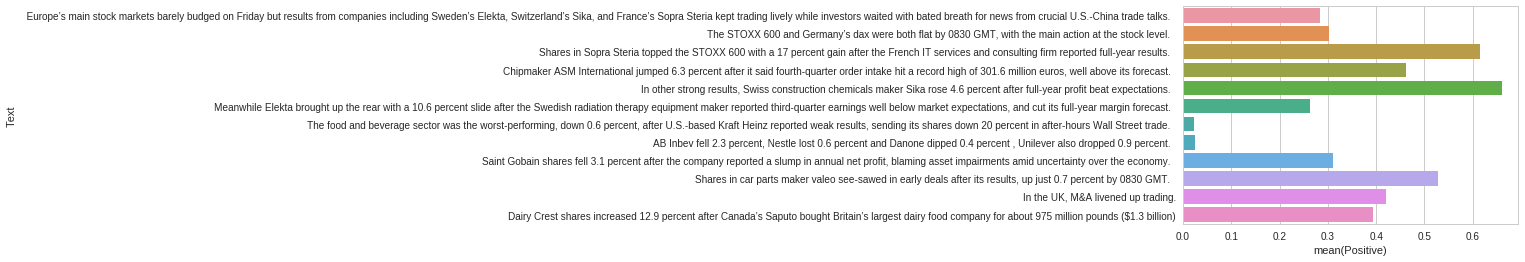

In [243]:
sns.set_style("whitegrid")
ax=sns.barplot(x='Positive',y='Text', data=data)




Using Sequential models we can learn longer dependencies between sentences.

In [0]:
########### https://in.reuters.com/article/europe-stocks/european-shares-flat-results-from-elekta-sika-sopra-steria-drive-big-swings-idINL5N20H1ZY

In [245]:
learn.predict("People said it was worst possible thing ever,but it was completely opposite for me it was the best experience of my life.")

(Category pos, tensor(1), tensor([0.3142, 0.6858]))